# Iman Noor
---

# 🌟 **LOGISTIC REGRESSION FROM SCRATCH** 🌟

Logistic regression is a `supervised machine learning` algorithm used for binary classification tasks where `sigmoid` function is used and where the goal is to predict the probability that an instance belongs to a given class or not (between 0 and 1).

## **Key Points:**
- Logistic regression predicts the output of a categorical dependent variable. Therefore, the outcome must be a categorical or discrete value.
- It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- In Logistic regression, instead of fitting a regression line, we fit an `S` shaped logistic function, which predicts two maximum values (0 or 1).

## Types of Logistic Regression

Logistic Regression can be classified into three types based on the nature of the dependent variable:

1. **Binomial Logistic Regression**: This type deals with two possible outcomes for the dependent variable. Examples include binary classifications such as 0 or 1, Yes or No, Pass or Fail.

2. **Multinomial Logistic Regression**: This type is used when the dependent variable has three or more possible categories that are not ordered. Examples include categories such as "cat," "dog" or "sheep."

3. **Ordinal Logistic Regression**: This type applies when the dependent variable has three or more possible categories that are ordered. Examples include ordered levels such as "Low," "Medium" or "High."

## **DATA PREPARATION**

In [1]:
# Importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generating synthetic data
np.random.seed(0)
num_samples = 100
years_of_experience = np.random.normal(5, 2, num_samples)  # Normally distributed around 5 years
education_level = np.random.choice([0, 1, 2], num_samples)  # 0: High School, 1: Bachelor's, 2: Master's
promotion = (years_of_experience + education_level > 5).astype(int)

In [3]:
data = pd.DataFrame({
    'years_of_experience': years_of_experience,
    'education_level': education_level,
    'promotion': promotion
})
data.head()

,years_of_experience,education_level,promotion
0,8.528105,0,1
1,5.800314,0,1
2,6.957476,1,1
3,9.481786,2,1
4,8.735116,1,1


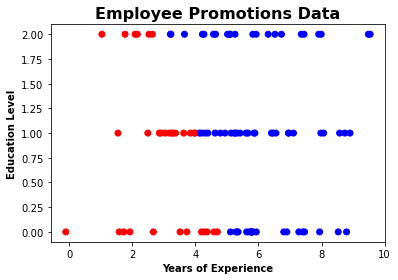

In [4]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(data['years_of_experience'], data['education_level'], c=data['promotion'].map(colors))
plt.xlabel('Years of Experience', weight='bold')
plt.ylabel('Education Level', weight='bold')
plt.title('Employee Promotions Data', weight='bold', fontsize=16)
plt.show()

*Let's implement the logistic regression model step by step.*

---
## **Sigmoid Function:**

The sigmoid function is used to map predicted values to probabilities. It is defined as:

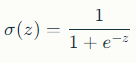

where:
- `z` is the input value.

    - σ(z)  tends towards 1 as z → ∞
    - σ(z)  tends towards 0 as z → −∞  
    - σ(z)  is always bounded between 0 and 1

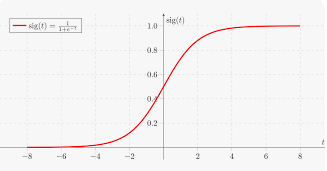

### **Better Visualization**

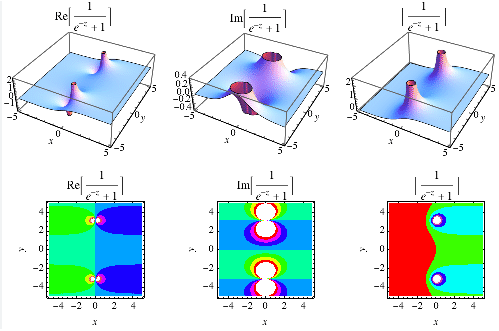


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Let's test the sigmoid function

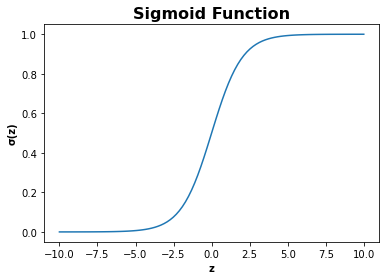

In [6]:
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z', weight='bold')
plt.ylabel('σ(z)', weight='bold')
plt.title('Sigmoid Function', weight='bold', fontsize=16)
plt.show()

---
## **Cost Function:**

The cost function for logistic regression, often called the binary cross-entropy loss measures the error of our predictions and is defined as:

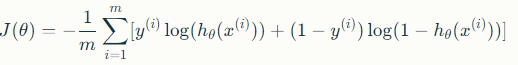

where:
- `m` is the number of training examples.
- `y^(i)` is the true label.
- `h_theta(x^(i))` is the predicted probability.


In [7]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost

Now preparing data for logistic regression

In [8]:
X = data[['years_of_experience', 'education_level']].values
y = data['promotion'].values

In [9]:
X = np.hstack((np.ones((X.shape[0], 1)), X)) # Intercept term to X

In [10]:
theta = np.zeros(X.shape[1]) # Initializing parameters

In [11]:
initial_cost = compute_cost(X, y, theta)
print(f'Initial Cost: {initial_cost:.4f}')

Initial Cost: 0.6931


---
## **Gradient Descent:**

Gradient Descent is an optimization algorithm used to minimize the cost function. The parameters are updated as follows:

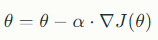

where:
- `alpha` is the learning rate.
- 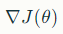 is the gradient of the cost function with respect to `theta_j`.

In [12]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []

    for _ in range(num_iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

In [13]:
# Setting hyperparameters
alpha = 0.1
num_iterations = 1000

In [14]:
theta, J_history = gradient_descent(X, y, theta, alpha, num_iterations)

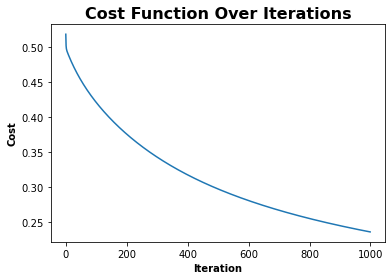

In [15]:
plt.plot(J_history)
plt.xlabel('Iteration', weight='bold')
plt.ylabel('Cost', weight='bold')
plt.title('Cost Function Over Iterations', weight='bold', fontsize=16)
plt.show()

---
## EVALUATION TECHNIQUES

A few techniques are:
- **Accuracy:** Accuracy provides the proportion of correctly classified instances.
> 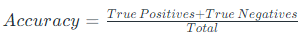
 
- **Precision:** Precision focuses on the accuracy of positive predictions.
> 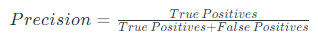

- **Recall (Sensitivity or True Positive Rate):** Recall measures the proportion of correctly predicted positive instances among all actual positive instances.
> 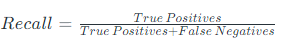

- **F1 Score:** F1 score is the harmonic mean of precision and recall.
> 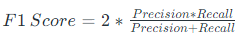

### Predictions and Accuracy

Let's use the trained model to make predictions and evaluate its accuracy.


In [16]:
# Prediction function
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

In [17]:
predictions = predict(X, theta)

In [18]:
accuracy = np.mean(predictions == y) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 91.00%


In [19]:
def plot_decision_boundary(X, y, theta):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid = np.hstack((np.ones((grid.shape[0], 1)), grid))
    probs = sigmoid(grid @ theta).reshape(xx.shape)

    plt.contourf(xx, yy, probs, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.xlabel('Years of Experience', weight='bold')
    plt.ylabel('Education Level', weight='bold')
    plt.title('Decision Boundary', weight='bold', fontsize=16)
    plt.show()

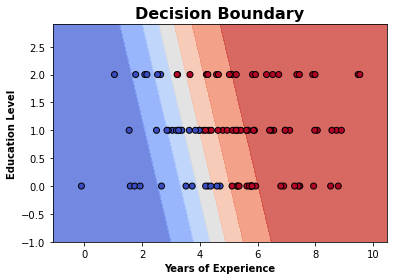

In [20]:
plot_decision_boundary(X, y, theta)

---
## **Logistic Regression from `sklearn.linear_model`**

In [21]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
X = data[['years_of_experience', 'education_level']].values
y = data['promotion'].values

## Training the model

In [23]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

## Model coefficients and intercept

In [24]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [[2.5720644 1.8184576]]
Intercept: [-12.06215256]


## Making prediction

In [25]:
predictions = model.predict(X)

accuracy = accuracy_score(y, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 97.00%


---
# BREAST CANCER EXAMPLE

In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
X, y = load_breast_cancer(return_X_y=True)

In [28]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Training the model

In [30]:
clf = LogisticRegression()
clf.fit(X, y)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Making the predictions

In [31]:
y_pred = clf.predict(X)

acc = accuracy_score(y, y_pred)
print('Logistic Regression model accuracy (in %):', acc*100, '%')

Logistic Regression model accuracy (in %): 94.72759226713534 %


# **The End :)**